In [1]:
import sys
import nltk
import demoji
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [28]:
plt.rcParams["figure.figsize"] = (16, 10)

In [2]:
# nltk.download("rslp");

#### add o path local + imports das libs continas na pasta src

In [3]:
sys.path.append("..")

In [4]:
from src.deployment.EDA_module import *
from src.data.data_cleaning_module import *

In [5]:
# configuração do tamanho de imagens
plt.rcParams["figure.figsize"] = (15, 12)

#### Carregando as Stopwords do NLTK

In [6]:
stopwords = nltk.corpus.stopwords.words('portuguese');

# carregamento de dados cus

In [7]:
df = pd.read_csv("../data/no-theme-tweets/rawNoThemeTweets.csv", delimiter= ",")

In [10]:
df = df.sample(100000) #Selecionando 100k tweets aleatórios

In [12]:
# Salvando a amostra
df.to_csv("../data/no-theme-tweets/sampleRawNoThemeTweets.csv", sep=",", index = False)

In [13]:
df.head(3)

,id,tweet_text,tweet_date,sentiment,query_used
46970,1030372677058473984,@hecticreacts IEAIAIO :),Fri Aug 17 08:36:04 +0000 2018,Positivo,:)
609185,1043307970254303232,@paularjc_ Infelizmente ta foda essa vida :(((,Sat Sep 22 01:16:18 +0000 2018,Negativo,:(
61180,1029923424980873216,@samuelpdf8 Senpai notice me :P :3,Thu Aug 16 02:50:54 +0000 2018,Positivo,:)


### Remoção de colunas desnecessárias id e query_used

In [14]:
df.drop(["id", "query_used"], axis=1, inplace=True)

### remoção de texto duplicado

In [16]:
df.drop_duplicates(["tweet_text"], inplace=True)

### remoção de emojis

In [17]:
df["tweet_text"] = df["tweet_text"].apply(lambda x: demoji.replace(x, "")) #muito pesado 

### remoção de links e menções de usuários

In [18]:
df["tweet_text"] = df["tweet_text"].apply(lambda x: limpa_texto(x))

### remoção de caracteres especiais

In [22]:
df["tweet_text"] = df["tweet_text"].apply(lambda x: remove_special_chars(x))

<h1 style="color:red">Pre-processamento de dados </h1>

#### Geração de novos dados pro dataframe

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99564 entries, 46970 to 655093
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  99564 non-null  object
 1   tweet_date  99564 non-null  object
 2   sentiment   99564 non-null  object
dtypes: object(3)
memory usage: 3.0+ MB


In [23]:
df = df.assign(
    number_words = df.tweet_text.apply(lambda x: len(x.split(" "))),
)  # adiciona coluna com número de palavras

df = df.assign(
    avg_word_length=df.tweet_text.str.split()
    .apply(lambda x: [len(i) for i in x])
    .map(lambda x: np.mean(x))
)  # adiciona coluna com média de caracteres por palavra no tweet

formated_df = df.drop(
    df[df.number_words < 5].index
)  # remove tweets com menos de 5 palavras

/home/gus/.cache/pypoetry/virtualenvs/src-YPTU7TNM-py3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gus/.cache/pypoetry/virtualenvs/src-YPTU7TNM-py3.8/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [24]:
formated_df.head(3)

,tweet_text,tweet_date,sentiment,number_words,avg_word_length
609185,Infelizmente ta foda essa vida,Sat Sep 22 01:16:18 +0000 2018,Negativo,6,5.2
61180,Senpai notice me P 3,Thu Aug 16 02:50:54 +0000 2018,Positivo,5,3.2
726422,Quero proteger esse neném,Sun Sep 30 02:03:53 +0000 2018,Negativo,5,5.5


# salvando os dados limpos e formatados

In [25]:
formated_df.to_csv("../data/no-theme-tweets/CleanText.csv", sep = ",", index = False)

### Separação dos tweets em positivos e negativos e junção dos textos positive_text, negative_text e all_text
### e plotagem das nuvens de palavras

In [26]:
df_positivo = formated_df.query("sentiment == 'Positivo'")
df_negativo = formated_df.query("sentiment == 'Negativo'")
df_all = formated_df

positive_text = " ".join(df_positivo.tweet_text)
negative_text = " ".join(df_negativo.tweet_text)
all_text = " ".join(df_all.tweet_text)

### cria as 50 stopwords que mais aparecem no corpus

analyzed stopwords:
 ['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivesse

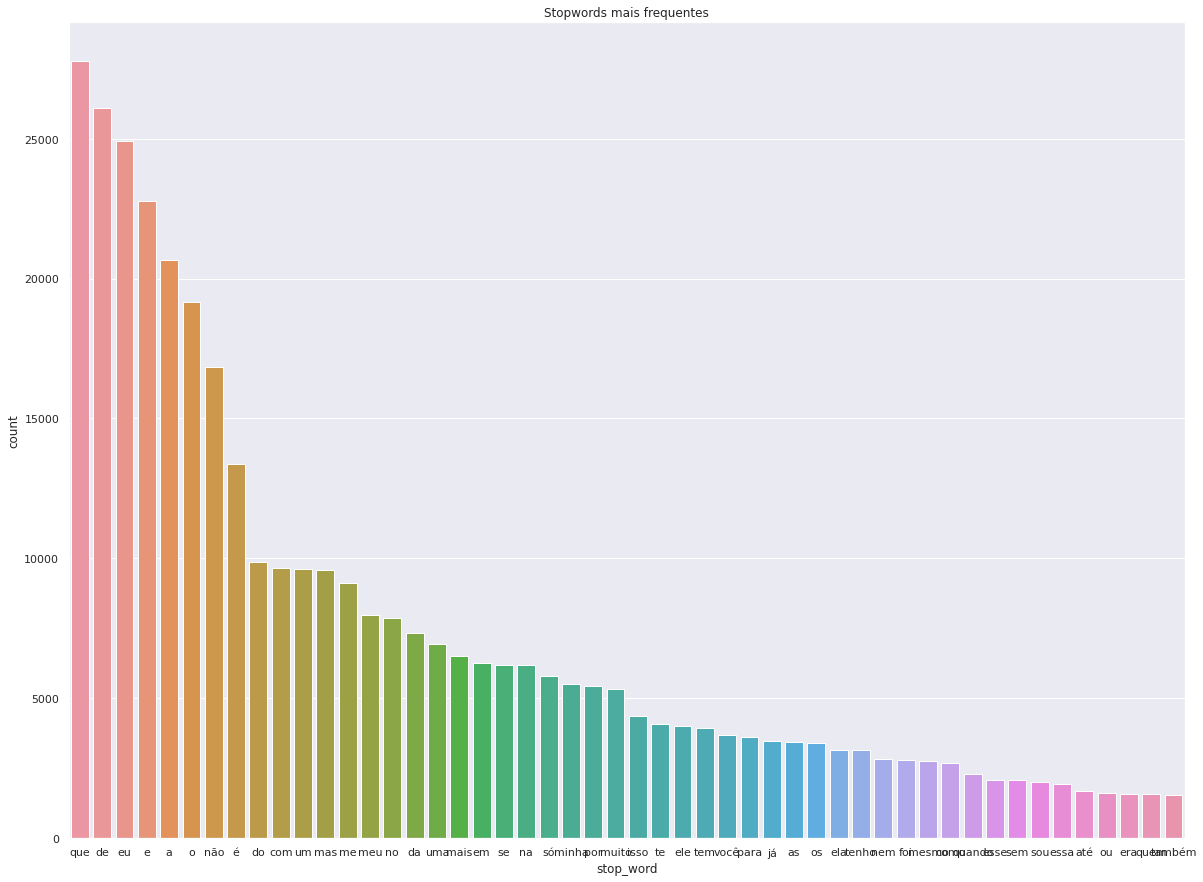

In [29]:
from collections import defaultdict

dic = defaultdict(int)

# stopwords = nltk.corpus.stopwords.words("portuguese")

print("analyzed stopwords:\n", stopwords)


for word in (all_text).split():
    if word in stopwords:
        dic[word] += 1


top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:50]  # top 50 stopwords


stopwords_df = pd.DataFrame(top, columns=["stop_word", "count"])


sns.set(rc={"figure.figsize": (20, 15)})
sns.barplot(x="stop_word", y="count", data=stopwords_df)
plt.title("Stopwords mais frequentes")
plt.show()

## O nltk considera como stop words algumas palavras que podem conter cunho sentimental, por conta disso essas palavras serão removidas desse vetor.

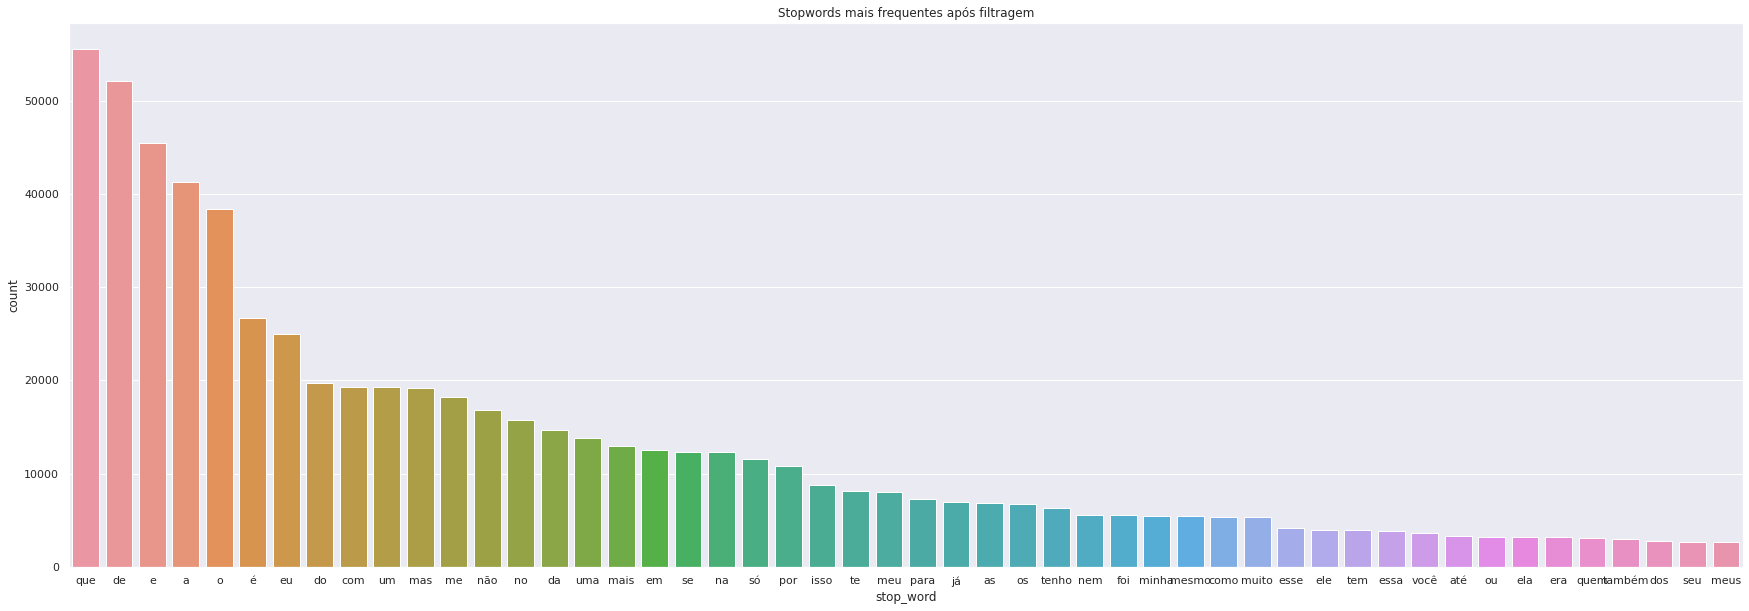

In [30]:
relevant_stop_words = [
    "eu",
    "não",
    "meu",
    "minha",
    "muito",
    "você",
    "tem",
    "ele",
    "ela",
    "quando",
    "sou",
    "você",
    "sem",
    "estou",
]  # stopwords consideradas relevantes para análise de sentimento, serão mantinidas em todo o processo de análise
stopwords = list(
    filter(lambda x: x not in relevant_stop_words, stopwords)
)  # remove do conjunto de stopwords palavras que não serão consideradas para filtragem

for word in all_text.split():
    if word in stopwords:
        dic[word] += 1

top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:50]  # top 50 stopwords


stopwords_df = pd.DataFrame(top, columns=["stop_word", "count"])


sns.set(rc={"figure.figsize": (30, 10)})
sns.barplot(x="stop_word", y="count", data=stopwords_df)
plt.title("Stopwords mais frequentes após filtragem")
plt.show()

## Análise das palavras mais frequentes que não são stop words.

#### Nota-se que há várias expressões e abreviações comuns  na internet e na língua portuguesa.

[('que', 27778), ('de', 26088), ('eu', 24935), ('e', 22765), ('a', 20669), ('o', 19177), ('não', 16852), ('é', 13374), ('do', 9854), ('com', 9655), ('pra', 9639), ('um', 9630), ('mas', 9582), ('me', 9112), ('meu', 7980), ('no', 7859), ('da', 7329), ('uma', 6931), ('mais', 6502), ('q', 6358), ('em', 6254), ('se', 6185), ('na', 6177), ('só', 5793), ('minha', 5494), ('por', 5427), ('muito', 5322), ('queria', 4620), ('to', 4510), ('isso', 4371), ('vou', 4296), ('—', 4291), ('Eu', 4128), ('te', 4058), ('ele', 3993), ('tem', 3921), ('vai', 3719), ('você', 3664), ('vc', 3650), ('para', 3612), ('bem', 3508), ('ter', 3485), ('n', 3465), ('já', 3454), ('as', 3428), ('os', 3388), ('dia', 3337), ('ser', 3288), ('pq', 3198), ('D', 3197), ('ela', 3151), ('tenho', 3147), ('triste', 3059), ('tá', 2977), ('tão', 2863), ('nem', 2801), ('ver', 2774), ('foi', 2773), ('mesmo', 2740), ('como', 2690), ('amo', 2682), ('fazer', 2659), ('tudo', 2642), ('nao', 2586), ('agora', 2584), ('gente', 2501), ('tô', 2383

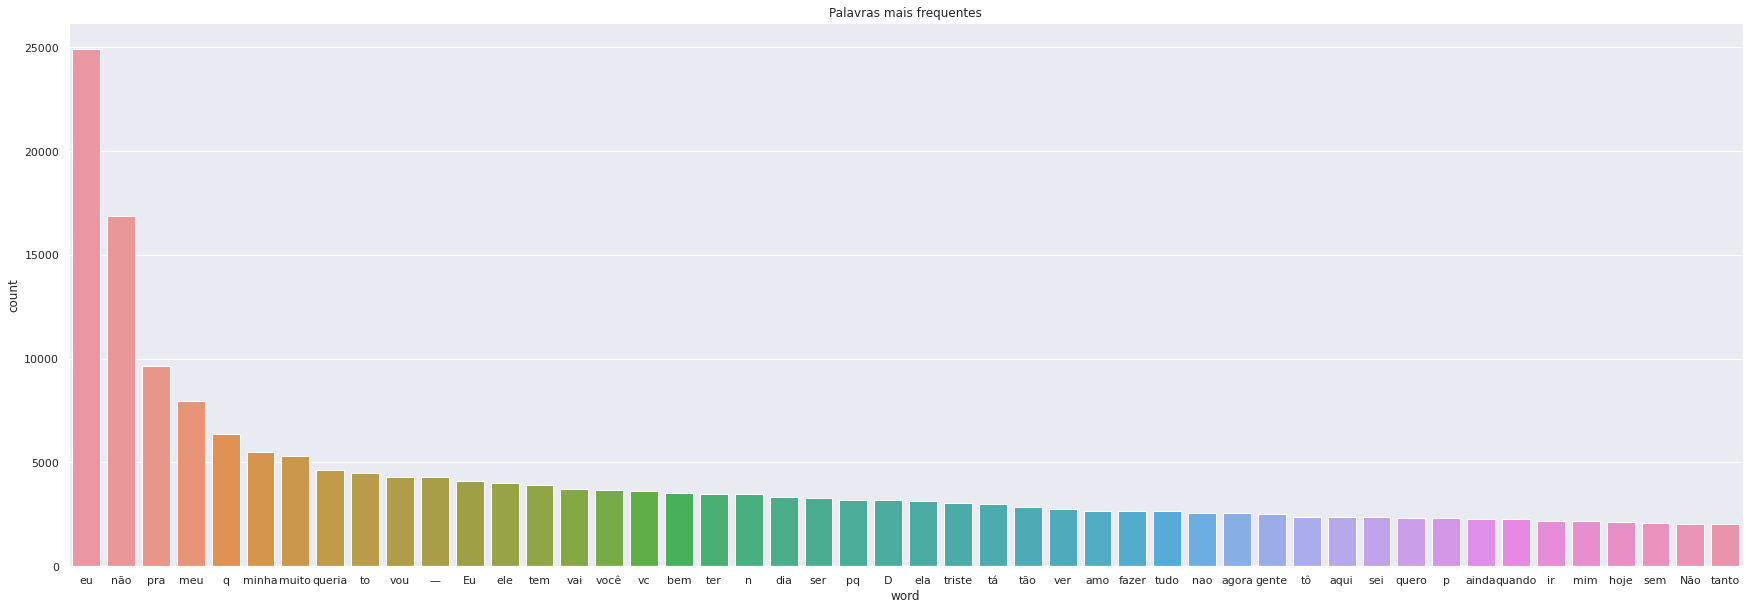

In [31]:
from collections import Counter


counter = Counter(all_text.split())
most = counter.most_common(80)
print(most)
print(len(most))

x, y = [], []
for word, count in most:
    if word not in stopwords:
        x.append(word)
        y.append(count)

most_common_words = list(zip(x, y))

most_common_words_df = pd.DataFrame(
    most_common_words, columns=["word", "count"]
)  # cria um dataframe com as palavras mais frequentes

sns.set(rc={"figure.figsize": (30, 10)})
sns.barplot(x="word", y="count", data=most_common_words_df)
plt.title("Palavras mais frequentes")
plt.show()

## Adiciona stopwords com palavras ou símbolos não relevantes para análise(descoberto com os gráficos anteriores).

In [32]:
invalid_terms = [
    "p",  # indentificava apenas como "p"
    "d",  # indentificava apenas como "d"
    "(",
    "pra",
    "q",
    "_",
    "((",
    "pq",
    "ai",
    "D",
    "P",
]  # palavras inrelevantes para análise de sentimento, ou termos abreviados já contidos em stopwords

stopwords.extend(invalid_terms)

counter = Counter(all_text.split())
most = counter.most_common(80)
print(most)
print(len(most))

x, y = [], []
for word, count in most:
    if word not in stopwords:
        x.append(word)
        y.append(count)


most_common_words_filtered = list(zip(x, y))

most_common_words_filtered_df = pd.DataFrame(
    most_common_words_filtered, columns=["word", "count"]
)

[('que', 27778), ('de', 26088), ('eu', 24935), ('e', 22765), ('a', 20669), ('o', 19177), ('não', 16852), ('é', 13374), ('do', 9854), ('com', 9655), ('pra', 9639), ('um', 9630), ('mas', 9582), ('me', 9112), ('meu', 7980), ('no', 7859), ('da', 7329), ('uma', 6931), ('mais', 6502), ('q', 6358), ('em', 6254), ('se', 6185), ('na', 6177), ('só', 5793), ('minha', 5494), ('por', 5427), ('muito', 5322), ('queria', 4620), ('to', 4510), ('isso', 4371), ('vou', 4296), ('—', 4291), ('Eu', 4128), ('te', 4058), ('ele', 3993), ('tem', 3921), ('vai', 3719), ('você', 3664), ('vc', 3650), ('para', 3612), ('bem', 3508), ('ter', 3485), ('n', 3465), ('já', 3454), ('as', 3428), ('os', 3388), ('dia', 3337), ('ser', 3288), ('pq', 3198), ('D', 3197), ('ela', 3151), ('tenho', 3147), ('triste', 3059), ('tá', 2977), ('tão', 2863), ('nem', 2801), ('ver', 2774), ('foi', 2773), ('mesmo', 2740), ('como', 2690), ('amo', 2682), ('fazer', 2659), ('tudo', 2642), ('nao', 2586), ('agora', 2584), ('gente', 2501), ('tô', 2383

### plot das palavras mais frequentes após a filtragem

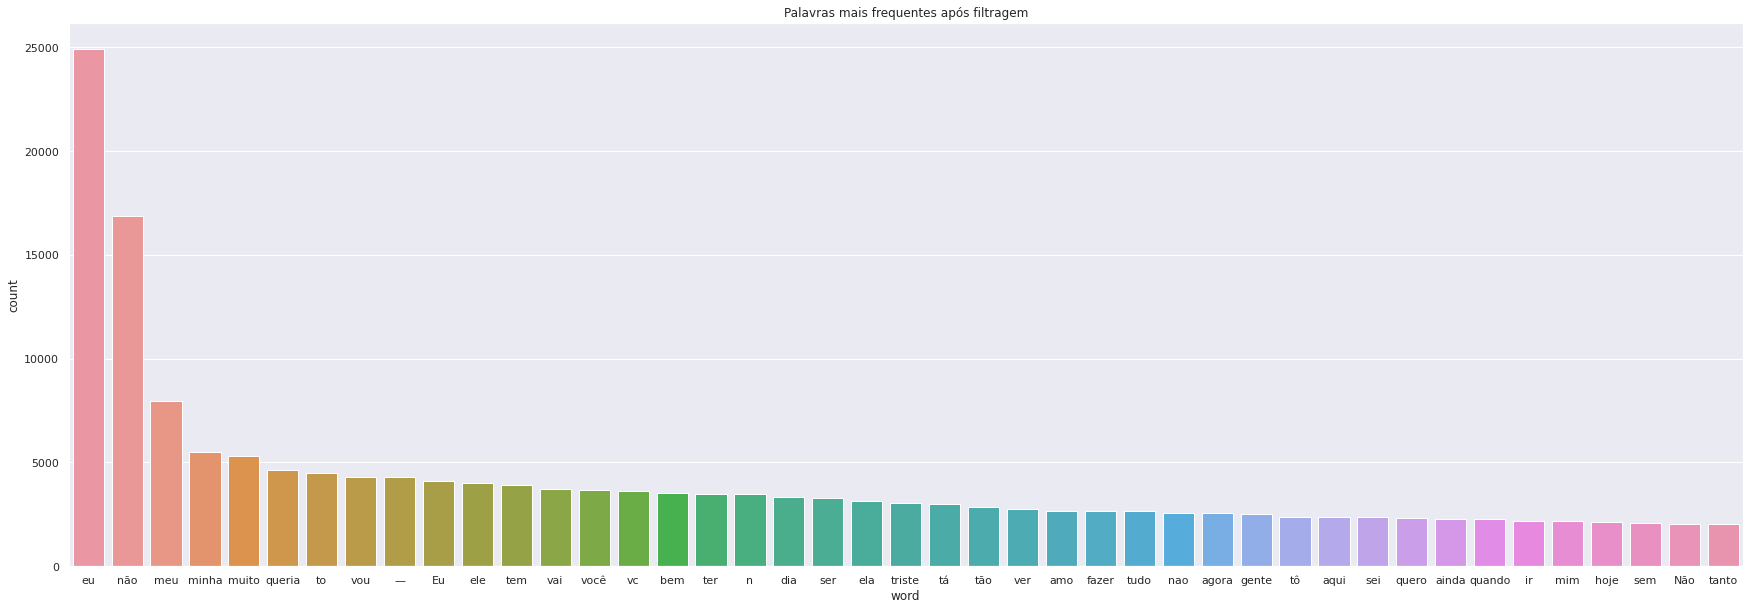

In [33]:
sns.set(rc={"figure.figsize": (30, 10)})
sns.barplot(x="word", y="count", data=most_common_words_filtered_df)
plt.title("Palavras mais frequentes após filtragem")
plt.show()

## Salvando as stopwords para serem utilizadas na limpeza dos textos no notebook dataframe-preprocessing

In [34]:
with open("../data/no-theme-tweets/stopwords.csv","w") as file:
    file.writelines("words\n")
    
    for word in stopwords:
        file.writelines(word);
        file.writelines("\n");
    
    file.close()

<h1 style="color:red">Wordclouds</h1>

### Utilizando as análises anteriores é definido um conjunto final de stop words e utilizado para filtrar todos os corpus

In [35]:
final_stop_words = stopwords

positive_filter = remover_stop_words(positive_text, final_stop_words)
negative_filter = remover_stop_words(negative_text, final_stop_words)
all_text_filter = remover_stop_words(all_text, final_stop_words)

<h2 style="color:red"> Plot do Texto Completo Sem Stopwords</h2>

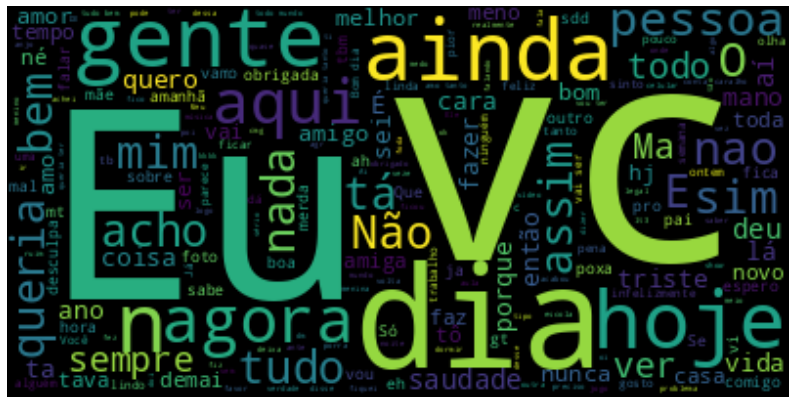

In [36]:
wordcloud = WordCloud().generate(all_text_filter)
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h2 style="color:red"> wordcloud do texto positivo sem stopwords</h2>

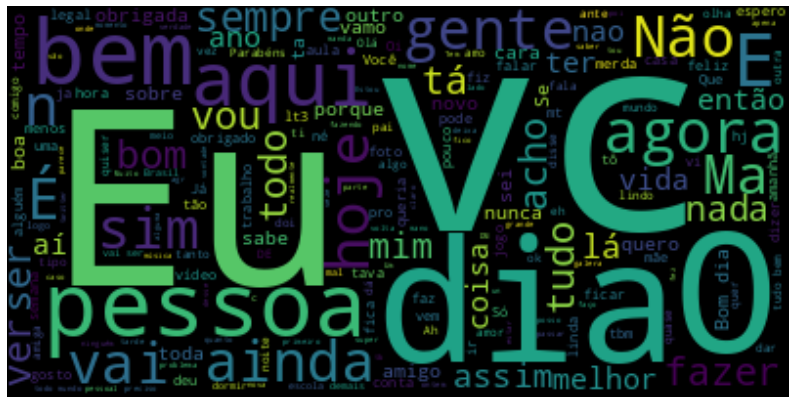

In [37]:
# Generate a word cloud image
wordcloud = WordCloud().generate(positive_filter)
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h2 style="color:red"> wordcloud do texto negativo sem stopwords</h2>

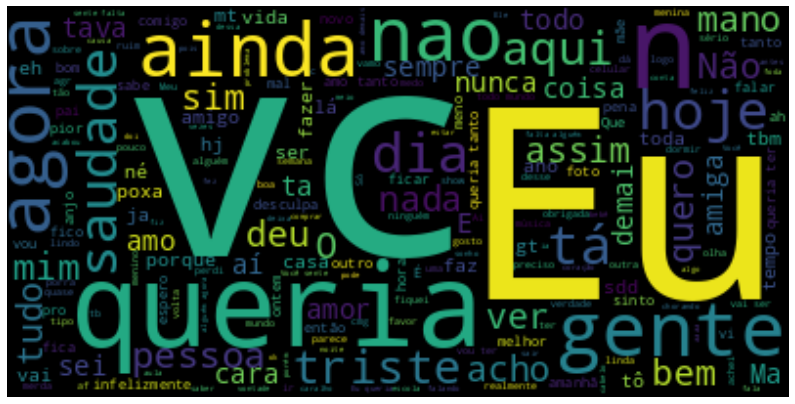

In [38]:
wordcloud = WordCloud().generate(negative_filter)
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Aplicando a função Stemming no texto

In [39]:
positive_text_with_stemming_without_stopwords = stemming(positive_filter);

In [40]:
negative_text_with_stemming_without_stopwords = stemming(negative_filter);

<h2 style="color:red">wordcloud do texto sem stopwords e com stemming</h2>

#### texto positivo

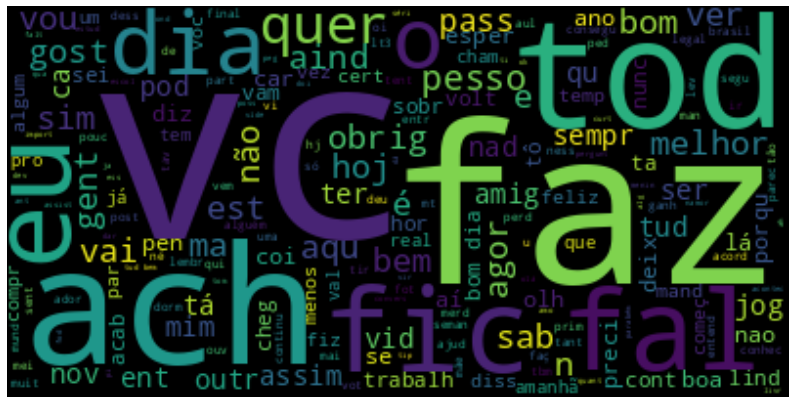

In [41]:
wordcloud = WordCloud().generate(positive_text_with_stemming_without_stopwords)
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### texto negativo

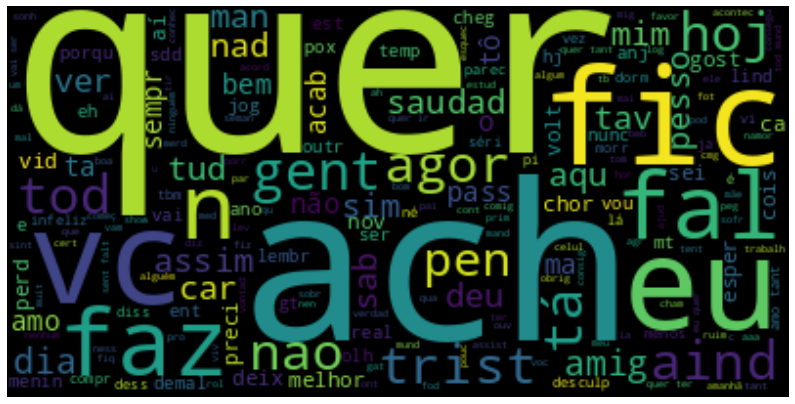

In [42]:
wordcloud = WordCloud().generate(negative_text_with_stemming_without_stopwords)
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h2 style="color:red"> stemming e plot do texto completo sem stopwords </h2>

In [43]:
complete_text_with_stemming_without_stopwords = stemming(all_text_filter);

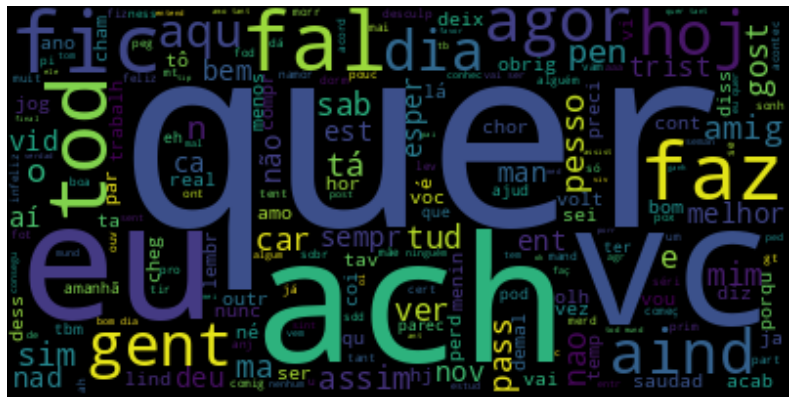

In [44]:
wordcloud = WordCloud().generate(complete_text_with_stemming_without_stopwords)
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()